In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
teams = pd.read_csv('/content/sample_data/teams.csv')
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


In [3]:
teams = teams.drop(['events','height','weight','prev_3_medals'],axis = 1)

In [4]:
teams

,team,country,year,athletes,age,medals,prev_medals
0,AFG,Afghanistan,1964,8,22.0,0,0.0
1,AFG,Afghanistan,1968,5,23.2,0,0.0
2,AFG,Afghanistan,1972,8,29.0,0,0.0
3,AFG,Afghanistan,1980,11,23.6,0,0.0
4,AFG,Afghanistan,2004,5,18.6,0,0.0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0,0.0
2140,ZIM,Zimbabwe,2004,14,25.1,3,0.0
2141,ZIM,Zimbabwe,2008,16,26.1,4,3.0
2142,ZIM,Zimbabwe,2012,9,27.3,0,4.0


In [5]:
teams.corr()['medals']

<ipython-input-5-7c8033a45347>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  teams.corr()['medals']


year          -0.021603
athletes       0.840817
age            0.025096
medals         1.000000
prev_medals    0.920048
Name: medals, dtype: float64

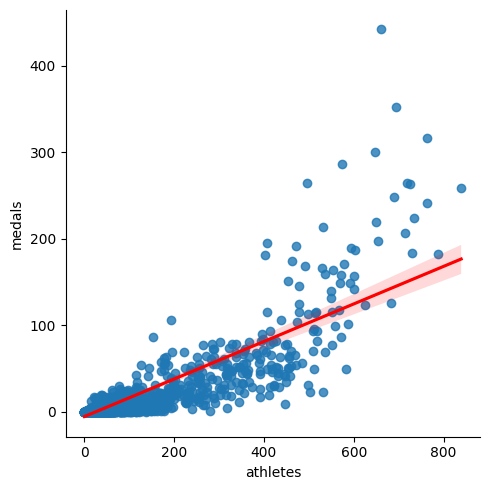

In [6]:
sns.lmplot( x = 'athletes', y = 'medals', data = teams, fit_reg = True,line_kws={'color': 'red'})

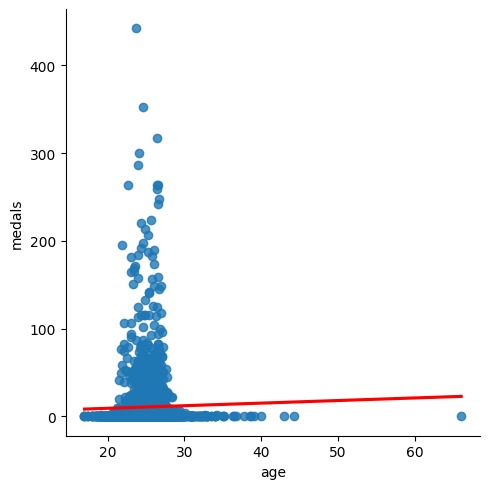

In [7]:
#ci specifies the confidence interval for the regression estimate
sns.lmplot( x = 'age', y = 'medals', data = teams, fit_reg = True,ci = None,line_kws={'color': 'red'})

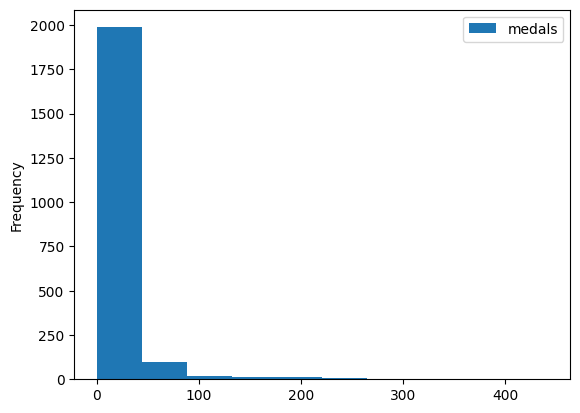

In [8]:
teams.plot.hist(y = 'medals');

In [9]:
teams[teams.isnull().any(axis = 1)]

,team,country,year,athletes,age,medals,prev_medals
19,ALB,Albania,1992,9,25.3,0,NaN
26,ALG,Algeria,1964,7,26.0,0,NaN
39,AND,Andorra,1976,3,28.3,0,NaN
50,ANG,Angola,1980,17,17.4,0,NaN
59,ANT,Antigua and Barbuda,1976,17,23.2,0,NaN
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,0,NaN
2103,YAR,North Yemen,1984,3,27.7,0,NaN
2105,YEM,Yemen,1992,8,19.6,0,NaN
2112,YMD,South Yemen,1988,5,23.6,0,NaN


In [10]:
teams = teams.dropna()

In [11]:
teams

,team,country,year,athletes,age,medals,prev_medals
0,AFG,Afghanistan,1964,8,22.0,0,0.0
1,AFG,Afghanistan,1968,5,23.2,0,0.0
2,AFG,Afghanistan,1972,8,29.0,0,0.0
3,AFG,Afghanistan,1980,11,23.6,0,0.0
4,AFG,Afghanistan,2004,5,18.6,0,0.0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0,0.0
2140,ZIM,Zimbabwe,2004,14,25.1,3,0.0
2141,ZIM,Zimbabwe,2008,16,26.1,4,3.0
2142,ZIM,Zimbabwe,2012,9,27.3,0,4.0


We are trying to split the time-series data into training and test. 2012 and 2016 as test and other as train data

In [12]:
train = teams[teams['year']<2012].copy()
test = teams[teams['year']>=2012].copy()

In [13]:
train.shape

(1609, 7)

In [14]:
test.shape

(405, 7)

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [16]:
predictors = ['athletes','prev_medals'] #X
target = "medals" # y

In [17]:
model.fit(train[predictors],train['medals'])

LinearRegression()

In [18]:
predictions = model.predict(test[predictors])

# After seeing the predictions, we found two majors problems:
* Medals need to be a whole number
* Countries can't win negative medals

In [20]:
test['predictions'] = predictions

In [21]:
test

,team,country,year,athletes,age,medals,prev_medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1,1.0,-0.961221
7,AFG,Afghanistan,2016,3,24.7,0,1.0,-1.176333
24,ALB,Albania,2012,10,25.7,0,0.0,-1.425032
25,ALB,Albania,2016,6,23.7,0,0.0,-1.711847
37,ALG,Algeria,2012,39,24.8,1,2.0,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0,0.0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0,0.0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0,0.0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,0,4.0,1.505767


In [24]:
#Predictions less than zero are converted to zero
test.loc[test['predictions']< 0 , "predictions"] = 0

In [25]:
test

,team,country,year,athletes,age,medals,prev_medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1,1.0,0.000000
7,AFG,Afghanistan,2016,3,24.7,0,1.0,0.000000
24,ALB,Albania,2012,10,25.7,0,0.0,0.000000
25,ALB,Albania,2016,6,23.7,0,0.0,0.000000
37,ALG,Algeria,2012,39,24.8,1,2.0,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0,0.0,0.000000
2131,ZAM,Zambia,2012,7,22.6,0,0.0,0.000000
2132,ZAM,Zambia,2016,7,24.1,0,0.0,0.000000
2142,ZIM,Zimbabwe,2012,9,27.3,0,4.0,1.505767


In [28]:
test['predictions'] = test['predictions'].round()

In [29]:
test

,team,country,year,athletes,age,medals,prev_medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1,1.0,0.0
7,AFG,Afghanistan,2016,3,24.7,0,1.0,0.0
24,ALB,Albania,2012,10,25.7,0,0.0,0.0
25,ALB,Albania,2016,6,23.7,0,0.0,0.0
37,ALG,Algeria,2012,39,24.8,1,2.0,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0,0.0,0.0
2131,ZAM,Zambia,2012,7,22.6,0,0.0,0.0
2132,ZAM,Zambia,2016,7,24.1,0,0.0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,0,4.0,2.0


In [41]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test['medals'],test['predictions'])

In [42]:
mae

3.2987654320987656

In [34]:
#generally check if the error is higher than the SD, if it is higher something might be wrong
teams.describe()['medals']

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [35]:
test[test['team'] == 'USA']

,team,country,year,athletes,age,medals,prev_medals,predictions
2053,USA,United States,2012,689,26.7,248,317.0,285.0
2054,USA,United States,2016,719,26.4,264,248.0,236.0


In [38]:
test[test['team'] == 'ESP']

,team,country,year,athletes,age,medals,prev_medals,predictions
621,ESP,Spain,2012,339,26.5,63,70.0,75.0
622,ESP,Spain,2016,363,27.7,45,63.0,71.0


In [47]:
errors  = (test['medals'] - test['predictions']).abs()

In [48]:
errors

6       1.0
7       0.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    2.0
2143    0.0
Length: 405, dtype: float64

In [50]:
error_by_team = errors.groupby(test['team']).mean()
error_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.0
Length: 204, dtype: float64

In [52]:
medals_by_team = test['medals'].groupby(test['team']).mean()

In [54]:
error_ratio = error_by_team / medals_by_team

In [55]:
error_ratio

team
AFG    1.0
ALB    NaN
ALG    1.0
AND    NaN
ANG    NaN
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    inf
Length: 204, dtype: float64

In [56]:
error_ratio[~ pd.isnull(error_ratio)]

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
ZIM         inf
Length: 102, dtype: float64

In [57]:
import numpy as np
error_ratio = error_ratio[np.isfinite(error_ratio)]

In [58]:
error_ratio

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
Length: 97, dtype: float64

<Axes: ylabel='Frequency'>

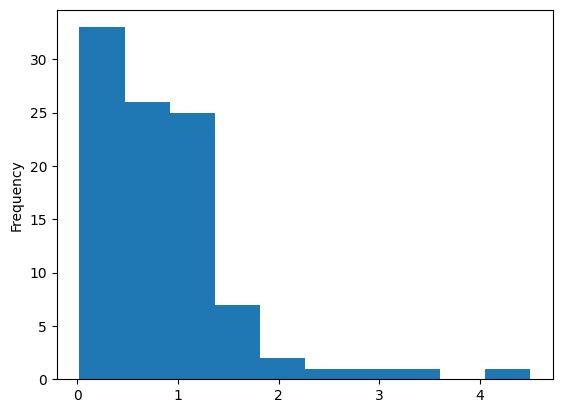

In [59]:
error_ratio.plot.hist()

In [60]:
error_ratio.sort_values()

team
FRA    0.022472
CAN    0.048387
NZL    0.063492
RUS    0.082353
ITA    0.121429
         ...   
MAR    2.000000
EGY    2.400000
HKG    3.000000
POR    3.333333
AUT    4.500000
Length: 97, dtype: float64

In [ ]:
# Add in more predictors (events, age, height)
# try different models random forest, neutral network
# try to reshape the columns